In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_curve
from sklearn import metrics
import seaborn as sns

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [3]:
# Import the data
Df=pd.read_csv('Manufacturing_Defect_Detection.csv')
Df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,Response
0,1.204110,0.201846,0.247125,0.659175,-0.300867,-0.631273,-0.070489,0.004892,0.218047,-0.291939,...,-0.820404,0.170194,-0.000176,0.099336,0.127871,-0.015577,0.025451,5.99,59202.0,0
1,-0.633762,0.116043,2.952224,0.979467,-0.885711,1.295048,-0.464558,0.675508,0.932822,-0.788520,...,0.749267,-0.124995,0.249201,-0.026381,-0.281868,0.161717,0.069094,38.85,45752.0,0
2,-1.065838,0.903341,2.217500,-0.282353,-0.922487,0.186707,-0.594496,0.810488,0.558529,-1.022652,...,0.856318,-0.286116,1.070103,0.395024,-0.368113,0.259750,0.095906,3.36,125613.0,0
3,-1.744026,0.704469,0.750703,0.353785,-0.274655,-1.430687,0.310802,0.264398,-0.249862,-0.295050,...,-0.673096,0.280075,0.669255,-0.084943,0.060773,0.221972,0.024840,54.99,38456.0,0
4,1.368737,-1.352339,-2.168882,0.235720,0.270632,0.120212,0.509787,-0.077671,0.582654,-0.035223,...,-1.029012,-0.110548,-0.356506,-0.202722,-0.630084,-0.104207,0.000125,378.41,127756.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229994,1.139995,-0.198070,1.497361,0.612975,-1.234898,-0.166071,-0.900254,0.199710,0.765065,-0.152779,...,0.850549,0.046287,0.448356,0.067212,0.588427,0.030440,0.029505,2.30,63787.0,0
229995,1.298643,0.099030,-1.298019,-0.059407,2.257046,3.291587,-0.359676,0.764205,-0.153402,0.074370,...,-0.176101,-0.135655,1.004041,0.847601,-0.312910,0.016172,0.013670,4.95,69229.0,0
229996,-1.054316,1.073038,1.020169,-1.118717,-0.039725,-0.482900,0.563730,-1.482451,1.552250,0.554517,...,-0.257488,0.302094,-0.002740,-1.351363,-0.578277,-0.762205,-0.104099,11.56,137551.0,0
229997,-1.160646,1.990422,-1.859998,-0.086371,2.398877,4.466000,-3.861713,-7.022504,-1.622576,-2.123338,...,0.326841,-0.410496,0.907390,1.202811,0.613093,-0.056817,0.283970,0.76,51843.0,0


In [4]:
# Declare feature variables and target variable
X =Df[Df.columns[0:30]]
Y =Df[Df.columns[30:31]]

In [5]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_features

array([[ 0.61893188,  0.14365605,  0.13782034, ...,  0.07400072,
        -0.33901576, -0.82573455],
       [-0.30880065,  0.09278257,  1.9405174 , ...,  0.2024245 ,
        -0.21021434, -1.17081991],
       [-0.52690672,  0.55957718,  1.45089168, ...,  0.28132442,
        -0.34932457,  0.8781661 ],
       ...,
       [-0.52109063,  0.66019157,  0.65298237, ..., -0.30721299,
        -0.31718301,  1.18445822],
       [-0.57476437,  1.20411468, -1.26638163, ...,  0.83472168,
        -0.3595158 , -1.0145437 ],
       [ 1.0896437 , -0.35167204, -1.32575282, ..., -0.14504305,
        -0.22440366, -0.10626365]])

In [6]:
#Split X and Y into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, Y, test_size=0.20, random_state=42,stratify=Y)

Data Resampling

In [7]:
#Applying Hybrid resamping techique
hybrid_pipeline = Pipeline([
    ('oversample', SMOTE(sampling_strategy=0.2)),  # Slight oversampling of minority class
    ('undersample', RandomUnderSampler(sampling_strategy=0.7))  # Slight undersampling of majority class
])

# Apply resampling only to the training data
X_train_resampled, y_train_resampled = hybrid_pipeline.fit_resample(X_train, y_train)


**Decision Tree**

In [8]:
#apply decision tree model
decisiontree = DecisionTreeClassifier(criterion = "gini", random_state = 20,
max_depth=3, min_samples_leaf=5)

# Train the model using the training sets
decisiontree.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = decisiontree.predict(X_test)

In [9]:
# Evaluation Accuracy and Confusion Matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9965869565217391
Confusion Matrix:
[[45766   142]
 [   15    77]]


In [10]:
# Calculate sensitivity and specificity
sensitivity = recall_score(y_test, y_pred)
specificity = precision_score(y_test, y_pred, pos_label=0)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.8369565217391305
Specificity: 0.9996723531596077


**Random Forest Model**

In [11]:
#Apply random forest technique
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)

C:\Users\dedee\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [12]:
# Evaluation Accuracy and Confusion Matrix
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9993043478260869
Confusion Matrix:
[[45890    18]
 [   14    78]]


In [13]:
# Calculate sensitivity and specificity
sensitivity = recall_score(y_test, y_pred_rf)
specificity = precision_score(y_test, y_pred_rf, pos_label=0)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.8478260869565217
Specificity: 0.9996950156849076


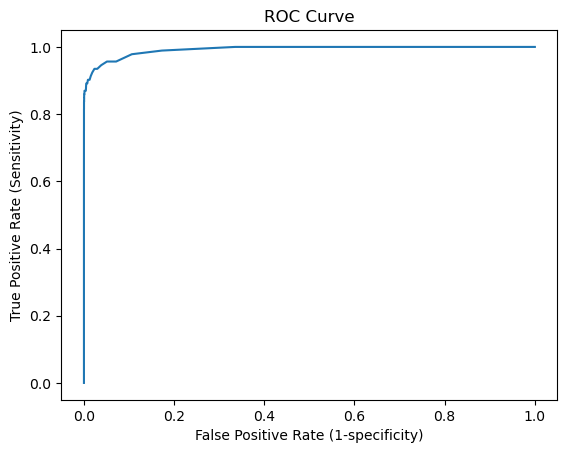

In [14]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1-specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

**SVM**

In [15]:
#Apply SVM technique
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm.predict(X_test)

C:\Users\dedee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
# Evaluation Accuracy and Confusion Matrix
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.9858695652173913
Confusion Matrix:
[[45266   642]
 [    8    84]]


In [17]:
# Calculate sensitivity and specificity
sensitivity = recall_score(y_test, y_pred_svm)
specificity = precision_score(y_test, y_pred_svm, pos_label=0)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9130434782608695
Specificity: 0.999823298140213


**Testing**

In [20]:
Test_data = pd.read_csv('Manufacturing_Defect_Detection_Test.csv')
Test_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,Response
0,-3.484268,-3.478996,-1.997164,5.583061,1.277970,-0.257365,1.571584,0.371628,-2.794352,1.432186,...,0.547391,1.763899,0.698150,-0.943907,0.204003,0.203824,-0.181849,722.58,154675,0
1,-0.162076,0.275857,1.609756,0.238198,-0.506164,0.332477,-0.232509,0.268916,1.316526,-1.459337,...,0.453633,0.056230,-0.019463,-1.131644,0.512097,0.276639,0.264650,26.50,154676,0
2,2.046965,-0.144759,-1.676612,0.005863,0.539168,-0.215378,0.065013,-0.116352,0.387979,0.161942,...,0.857349,-0.073066,0.132017,0.324705,-0.118361,-0.028546,-0.063637,19.95,154677,0
3,2.095883,-1.043785,-1.134008,-1.139906,-0.552036,-0.216809,-0.766197,0.071149,-0.321957,0.943442,...,-0.976831,0.433483,0.178759,-0.573893,-0.714417,-0.040165,-0.046876,56.90,154677,0
4,2.277383,-0.616234,-1.603675,-1.053846,-0.158831,-0.984861,-0.238083,-0.453934,-0.657152,0.846955,...,1.230527,-0.121151,-0.622204,0.343449,0.109208,-0.032566,-0.070512,15.00,154678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.085506,0.579300,-0.074732,-0.999896,1.270287,0.986924,0.603288,0.453590,-0.129915,-0.348872,...,-0.313096,0.078547,-1.663882,-0.680007,0.255428,0.285609,0.068247,4.99,169234,0
29996,1.992134,-0.568197,-0.483177,0.255276,-0.652462,-0.121949,-0.812815,0.163114,1.151521,0.255637,...,0.838369,0.064934,-0.461612,-0.228182,0.656891,-0.036813,-0.067132,6.47,169235,0
29997,-1.852996,-0.806818,-0.175668,-2.265274,-1.973852,2.618106,1.652370,0.496252,-0.979692,-0.696245,...,-0.279165,-0.199227,-1.621102,-0.457446,-0.539268,0.266872,-0.364070,565.11,169235,0
29998,1.866029,0.282282,0.116332,3.571717,-0.098658,0.554990,-0.560569,0.299129,-0.608678,1.612896,...,-0.498329,0.389276,-0.528965,-0.596614,-0.356843,-0.002190,-0.041018,1.00,169236,0


In [21]:
Test_data.isnull().sum()
Test_data.dropna()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,Response
0,-3.484268,-3.478996,-1.997164,5.583061,1.277970,-0.257365,1.571584,0.371628,-2.794352,1.432186,...,0.547391,1.763899,0.698150,-0.943907,0.204003,0.203824,-0.181849,722.58,154675,0
1,-0.162076,0.275857,1.609756,0.238198,-0.506164,0.332477,-0.232509,0.268916,1.316526,-1.459337,...,0.453633,0.056230,-0.019463,-1.131644,0.512097,0.276639,0.264650,26.50,154676,0
2,2.046965,-0.144759,-1.676612,0.005863,0.539168,-0.215378,0.065013,-0.116352,0.387979,0.161942,...,0.857349,-0.073066,0.132017,0.324705,-0.118361,-0.028546,-0.063637,19.95,154677,0
3,2.095883,-1.043785,-1.134008,-1.139906,-0.552036,-0.216809,-0.766197,0.071149,-0.321957,0.943442,...,-0.976831,0.433483,0.178759,-0.573893,-0.714417,-0.040165,-0.046876,56.90,154677,0
4,2.277383,-0.616234,-1.603675,-1.053846,-0.158831,-0.984861,-0.238083,-0.453934,-0.657152,0.846955,...,1.230527,-0.121151,-0.622204,0.343449,0.109208,-0.032566,-0.070512,15.00,154678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.085506,0.579300,-0.074732,-0.999896,1.270287,0.986924,0.603288,0.453590,-0.129915,-0.348872,...,-0.313096,0.078547,-1.663882,-0.680007,0.255428,0.285609,0.068247,4.99,169234,0
29996,1.992134,-0.568197,-0.483177,0.255276,-0.652462,-0.121949,-0.812815,0.163114,1.151521,0.255637,...,0.838369,0.064934,-0.461612,-0.228182,0.656891,-0.036813,-0.067132,6.47,169235,0
29997,-1.852996,-0.806818,-0.175668,-2.265274,-1.973852,2.618106,1.652370,0.496252,-0.979692,-0.696245,...,-0.279165,-0.199227,-1.621102,-0.457446,-0.539268,0.266872,-0.364070,565.11,169235,0
29998,1.866029,0.282282,0.116332,3.571717,-0.098658,0.554990,-0.560569,0.299129,-0.608678,1.612896,...,-0.498329,0.389276,-0.528965,-0.596614,-0.356843,-0.002190,-0.041018,1.00,169236,0


In [22]:
Test_X =Test_data[Test_data.columns[0:30]]
Test_X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
0,-3.484268,-3.478996,-1.997164,5.583061,1.277970,-0.257365,1.571584,0.371628,-2.794352,1.432186,...,1.040880,0.547391,1.763899,0.698150,-0.943907,0.204003,0.203824,-0.181849,722.58,154675
1,-0.162076,0.275857,1.609756,0.238198,-0.506164,0.332477,-0.232509,0.268916,1.316526,-1.459337,...,-0.031401,0.453633,0.056230,-0.019463,-1.131644,0.512097,0.276639,0.264650,26.50,154676
2,2.046965,-0.144759,-1.676612,0.005863,0.539168,-0.215378,0.065013,-0.116352,0.387979,0.161942,...,0.275938,0.857349,-0.073066,0.132017,0.324705,-0.118361,-0.028546,-0.063637,19.95,154677
3,2.095883,-1.043785,-1.134008,-1.139906,-0.552036,-0.216809,-0.766197,0.071149,-0.321957,0.943442,...,-0.229421,-0.976831,0.433483,0.178759,-0.573893,-0.714417,-0.040165,-0.046876,56.90,154677
4,2.277383,-0.616234,-1.603675,-1.053846,-0.158831,-0.984861,-0.238083,-0.453934,-0.657152,0.846955,...,0.397443,1.230527,-0.121151,-0.622204,0.343449,0.109208,-0.032566,-0.070512,15.00,154678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.085506,0.579300,-0.074732,-0.999896,1.270287,0.986924,0.603288,0.453590,-0.129915,-0.348872,...,-0.179187,-0.313096,0.078547,-1.663882,-0.680007,0.255428,0.285609,0.068247,4.99,169234
29996,1.992134,-0.568197,-0.483177,0.255276,-0.652462,-0.121949,-0.812815,0.163114,1.151521,0.255637,...,0.250889,0.838369,0.064934,-0.461612,-0.228182,0.656891,-0.036813,-0.067132,6.47,169235
29997,-1.852996,-0.806818,-0.175668,-2.265274,-1.973852,2.618106,1.652370,0.496252,-0.979692,-0.696245,...,-0.195264,-0.279165,-0.199227,-1.621102,-0.457446,-0.539268,0.266872,-0.364070,565.11,169235
29998,1.866029,0.282282,0.116332,3.571717,-0.098658,0.554990,-0.560569,0.299129,-0.608678,1.612896,...,-0.135742,-0.498329,0.389276,-0.528965,-0.596614,-0.356843,-0.002190,-0.041018,1.00,169236


In [23]:
scalertest = StandardScaler()
scaled_test = scalertest.fit_transform(Test_X)

In [24]:
decitree_pred = decisiontree.predict(scaled_test)
decitree_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
data = {'Response': decitree_pred}
dataTest = pd.DataFrame(data)
dataTest.to_csv("Output.csv", index=False)

In [28]:
random_forest_pred = rf.predict(scaled_test)
random_forest_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
data = {'Response': random_forest_pred}
dataTest = pd.DataFrame(data)
dataTest.to_csv("Output.csv", index=False)

In [30]:
svm_pred = svm.predict(scaled_test)
svm_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
data = {'Response': svm_pred}
dataTest = pd.DataFrame(data)
dataTest.to_csv("Deliverable.csv", index=False)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)